# Overfitting `vs.` Underfitting

# Setup and Baseline Model

In [2]:
%%time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ignore warnings in the output
import warnings
warnings.filterwarnings("ignore")

# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define a simple model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

# Train the baseline model
history_baseline = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 2.8139 - accuracy: 0.8499 - val_loss: 0.5377 - val_accuracy: 0.8748
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4231 - accuracy: 0.9042 - val_loss: 0.3769 - val_accuracy: 0.9192
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3208 - accuracy: 0.9232 - val_loss: 0.3173 - val_accuracy: 0.9238
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2642 - accuracy: 0.9346 - val_loss: 0.3516 - val_accuracy: 0.9278
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2382 - accuracy: 0.9402 - val_loss: 0.2559 - val_accuracy: 0.9397
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2305 - accuracy: 0.9430 - val_loss: 0.2662 - val_accuracy: 0.9438
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2180 - accuracy: 0.9467 - val_loss: 0.2722 - val_accurac

# Run model in Normalized Data

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2945 - accuracy: 0.9164 - val_loss: 0.1656 - val_accuracy: 0.9532
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1322 - accuracy: 0.9609 - val_loss: 0.1259 - val_accuracy: 0.9630
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0898 - accuracy: 0.9732 - val_loss: 0.0968 - val_accuracy: 0.9715
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0669 - accuracy: 0.9802 - val_loss: 0.1026 - val_accuracy: 0.9685
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0518 - accuracy: 0.9836 - val_loss: 0.0962 - val_accuracy: 0.9714
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0884 - val_accuracy: 0.9728
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0316 - accuracy: 0.9909 - val_loss: 0.0857 - val_accuracy:

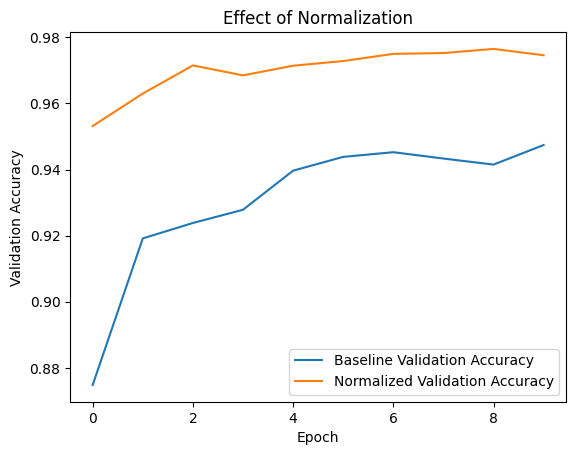

CPU times: total: 1min 55s
Wall time: 1min 9s


In [3]:
%%time
# Load and normalize the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a model for normalized data
def create_model_with_norm_data():
    model = Sequential([
        Flatten (input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_norm_data = create_model_with_norm_data()

# Train the baseline model
history_norm_data = model_with_norm_data.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# plot the effect of normalization
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.title('Effect of Normalization')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Adding Dropout

Now, let's modify the model to include dropout and observe its effect.

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4343 - accuracy: 0.8705 - val_loss: 0.1888 - val_accuracy: 0.9468
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2453 - accuracy: 0.9277 - val_loss: 0.1407 - val_accuracy: 0.9582
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2014 - accuracy: 0.9400 - val_loss: 0.1208 - val_accuracy: 0.9635
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1798 - accuracy: 0.9470 - val_loss: 0.1134 - val_accuracy: 0.9663
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1622 - accuracy: 0.9507 - val_loss: 0.1012 - val_accuracy: 0.9707
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1454 - accuracy: 0.9554 - val_loss: 0.0975 - val_accuracy: 0.9700
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1394 - accuracy: 0.9566 - val_loss: 0.0891 - val_accuracy:

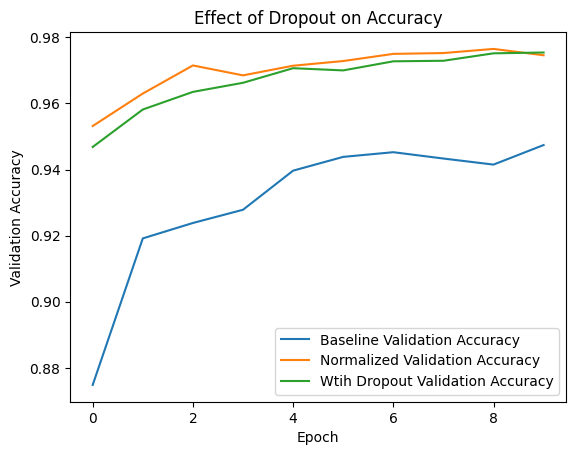

In [12]:
# Define a model with dropout 
def create_model_with_dropout():
    model = Sequential([
        Flatten(input_shape=(28 ,28)),
        Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5), # Adding dropout
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_dropout =create_model_with_dropout()

# Train the model with dropout
history_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Plotting the effect of dropout
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Wtih Dropout Validation Accuracy')
plt.title('Effect of Dropout on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Early Stopping

Finally, we will use early stopping to stop training when the validation loss starts to increase.

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2856 - accuracy: 0.9197 - val_loss: 0.1574 - val_accuracy: 0.9536
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1293 - accuracy: 0.9620 - val_loss: 0.1267 - val_accuracy: 0.9609
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0883 - accuracy: 0.9735 - val_loss: 0.1001 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0655 - accuracy: 0.9808 - val_loss: 0.0943 - val_accuracy: 0.9723
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0515 - accuracy: 0.9848 - val_loss: 0.0895 - val_accuracy: 0.9730
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0884 - val_accuracy: 0.9742
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.0931 - val_accuracy:

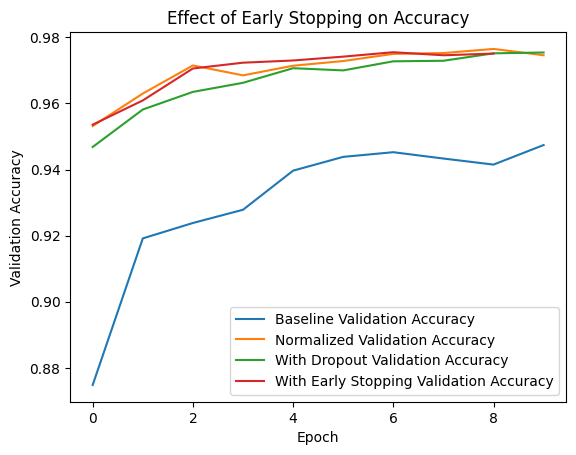

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model_with_es = create_model_with_norm_data()

# train with early stop
history_es = model_with_es.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# plot the effect of early stopping
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_es.history['val_accuracy'], label='With Early Stopping Validation Accuracy')
plt.title('Effect of Early Stopping on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()

# l1/L2 Regularization

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.6492 - accuracy: 0.8688 - val_loss: 0.3901 - val_accuracy: 0.9426
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4473 - accuracy: 0.9208 - val_loss: 0.3328 - val_accuracy: 0.9544
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4046 - accuracy: 0.9309 - val_loss: 0.3073 - val_accuracy: 0.9602
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3784 - accuracy: 0.9364 - val_loss: 0.2932 - val_accuracy: 0.9638
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3677 - accuracy: 0.9389 - val_loss: 0.2829 - val_accuracy: 0.9660
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3593 - accuracy: 0.9413 - val_loss: 0.2756 - val_accuracy: 0.9678
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3530 - accuracy: 0.9425 - val_loss: 0.2682 - val_accuracy:

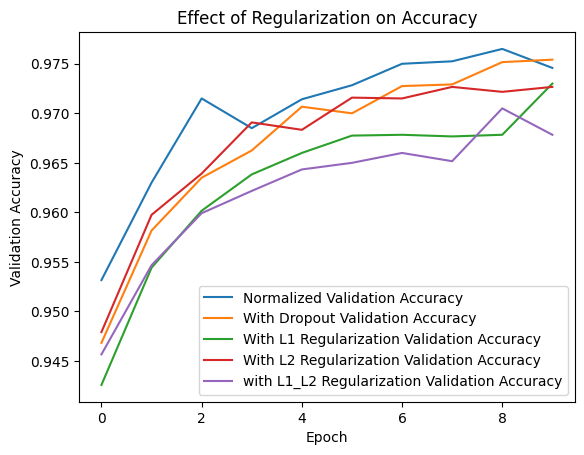

In [21]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt

# Define a model with L1 regulariztion
def create_model_with_l1():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l1(0.0001)), # L1 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L1
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define a model with L2 regulariztion
def create_model_with_l2():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.0001)), # L1 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L1
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# should we combine them both?
# Define a model with L1, L2 (combined) regularization
def create_model_with_l1_l2():
    model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)), # L1_L2 regularization
    Dropout(0.5), # Adding dropout which will also be regularized by L1_L2
    Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    return model

# Prepare and train the models
model_with_l1 = create_model_with_l1()
history_l1 = model_with_l1.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

model_with_l2 = create_model_with_l2()
history_l2 = model_with_l2.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

model_with_l1_l2 = create_model_with_l1_l2()
history_l1_l2 = model_with_l1_l2.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# plotting the effect of regularization
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='With L1 Regularization Validation Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='With L2 Regularization Validation Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='with L1_L2 Regularization Validation Accuracy')
plt.title('Effect of Regularization on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

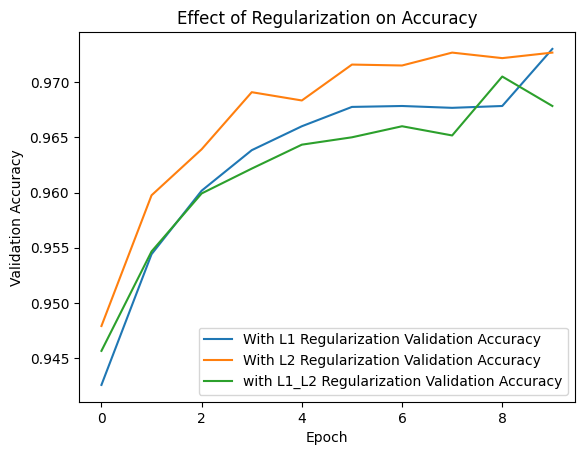

In [22]:
# plotting the effect of regularization
# plot line for normalized data
# plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
# plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='With L1 Regularization Validation Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='With L2 Regularization Validation Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='with L1_L2 Regularization Validation Accuracy')
plt.title('Effect of Regularization on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# K-fold crosss validation

In [3]:
%%time
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize data
y_train = to_categorical(y_train, 10) # One-hot encode labels

# Define a simple model architecture function
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Prepare for k-fold cross-validation
k = 5 # Number of folds 
kf = KFold(n_splits=k, shuffle=True)

# Arrays to store scores 
fold_idx = 1
scores = []

for train_index, val_index in kf.split(x_train):
    # Split data
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # create a model 
    model_kfold_cv = create_model()

    # Train model
    history_kfold_cv = model_kfold_cv.fit(x_train_fold, y_train_fold, epochs=10, validation_data=0.2, verbose=1)

    # Append the last score from the history
    scores.append((history_kfold_cv.history['val_loss'][-1], history_kfold_cv.history['val_accuracy']))

# Calculate and print average performance across all folds
average_loss, average_accuracy = np.mean(scores, axis=0)
print(f"\nK-Fold Validation Results:\nAverage Loss: {average_loss}, Average Accuracy: {average_accuracy}")

# Plotting 
folds = range(1, k + 1)
val_losses, val_accuracies = zip(*scores)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(folds, val_losses, 'o-', label='Validation Loss')
plt.plot(folds, [average_loss] * k, 'r--', label='Average Loss')
plt.title('Validation Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(folds, val_accuracies, 'o-', label='Validation Accuracy')
plt.plot(folds, [average_accuracy] * k, 'r--', label='Average Accuracy')
plt.title('Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/2
1495/1500 [============================>.] - ETA: 0s - loss: 0.2898 - accuracy: 0.9173

IndexError: tuple index out of range